In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ndf = pd.read_csv('netflix.csv')
#loading the data

In [3]:
ndf.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


## Problem Statement

Netflix is a streaming service company that offers movies,TV Shows,documentaries etc on a subscription based mode.
Since this is a subscription based model it is important to have great customer retention rate along with bringing in new customers. 

So inorder to have these it is essential to understand the content being provided to the customers and how the content being added is affecting the business. Understanding the content based on popularity gives a better insights on what kind of content to produce 

## Exploring Data

In [4]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
ndf.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

For director,cast,country,date_added imputing values with their respective characteristic measure/feature doesn't make sense

In [6]:
ndf['rating'].value_counts()
#even for rating imputing the value from 'rating' and replacing the null values with it doesn't make sense 
#as we can't come to a conclusion that a movie is a 'TV-MA' rated just beacuse it is the most frequent one

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
UR             3
NC-17          3
66 min         1
84 min         1
74 min         1
Name: rating, dtype: int64

### Note 

We are just exploring the data and getting insights and aren't not building any model. So missing values are ignored in the data exploration.



In [7]:
ndf.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s7355,Movie,Transformers: War for Cybertron: Earthrise,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


cast,country,listed_in has nested items in it. we analyse them individually after cleansing

In [8]:
for col in ['type','rating','duration']:
    print(f'Unique Categories and their frequency for {col}')
    print(ndf[col].value_counts())
    print()

Unique Categories and their frequency for type
Movie      6131
TV Show    2676
Name: type, dtype: int64

Unique Categories and their frequency for rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
UR             3
NC-17          3
66 min         1
84 min         1
74 min         1
Name: rating, dtype: int64

Unique Categories and their frequency for duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
93 min        146
             ... 
229 min         1
5 min           1
253 min         1
224 min         1
212 min         1
Name: duration, Length: 220, dtype: int64



In [9]:

def process(df,col,new_name):
    '''
    A function that takes in a column(which has a string separated by commas) 
    and returns a dataframe with comma each separated value of the column for each title''' 
    
    col_list = df[col].apply(lambda x:str(x).split(',')).to_list() #splitting values based on commas 
    
    temp_df = pd.DataFrame(col_list,index=df['title'])
    temp_df = temp_df.stack()
    df_new = pd.DataFrame(temp_df.reset_index())
    
    df_new.rename(columns={0:new_name},inplace = True)
    df_new.drop(columns='level_1',inplace=True)
    
    df_new[new_name] = df_new[new_name].apply(lambda x:str(x).strip()).to_list()
    
    
    return df_new
    
    
    

## Highest contributing countries based on content

In [10]:
cnt = process(ndf,'country','Country')

In [11]:
cnt

,title,Country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
...,...,...
10845,Zodiac,United States
10846,Zombie Dumb,nan
10847,Zombieland,United States
10848,Zoom,United States


In [12]:
cnt = cnt.loc[cnt['Country'] != 'nan']

In [13]:
cnt['Country'].nunique()

123

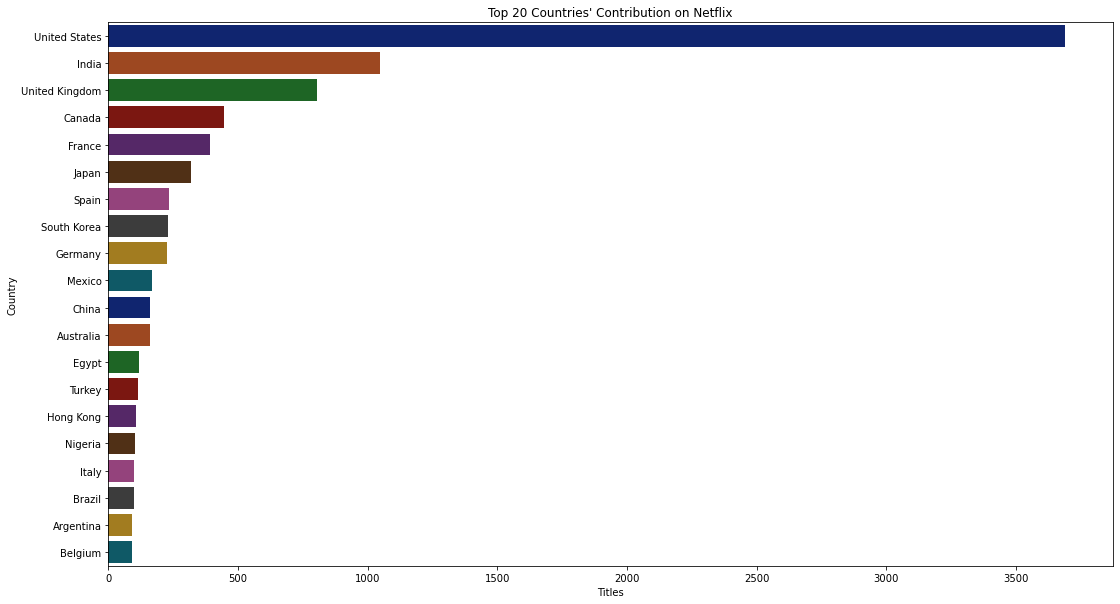

In [14]:
#countplot for countries' contribution to the content added to Netflix
plt.figure(figsize=(18,10))
sns.countplot(y = cnt['Country'], order=cnt['Country'].value_counts().index[:20],palette='dark')
plt.title("Top 20 Countries' Contribution on Netflix")
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()


## Insight

Netflix has its content being added from 123 countries.

United States is the largest contributor to netflix followed by India, UK, Canada and France. So whenever a business decision is made , it is to be made keeping in view of the audience of these top countries

## Analysing the genre that are being made the most

In [15]:
gn = process(ndf,'listed_in','Genre')
gn

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies


In [16]:
gn['Genre'].nunique()
# no.of genres available

42

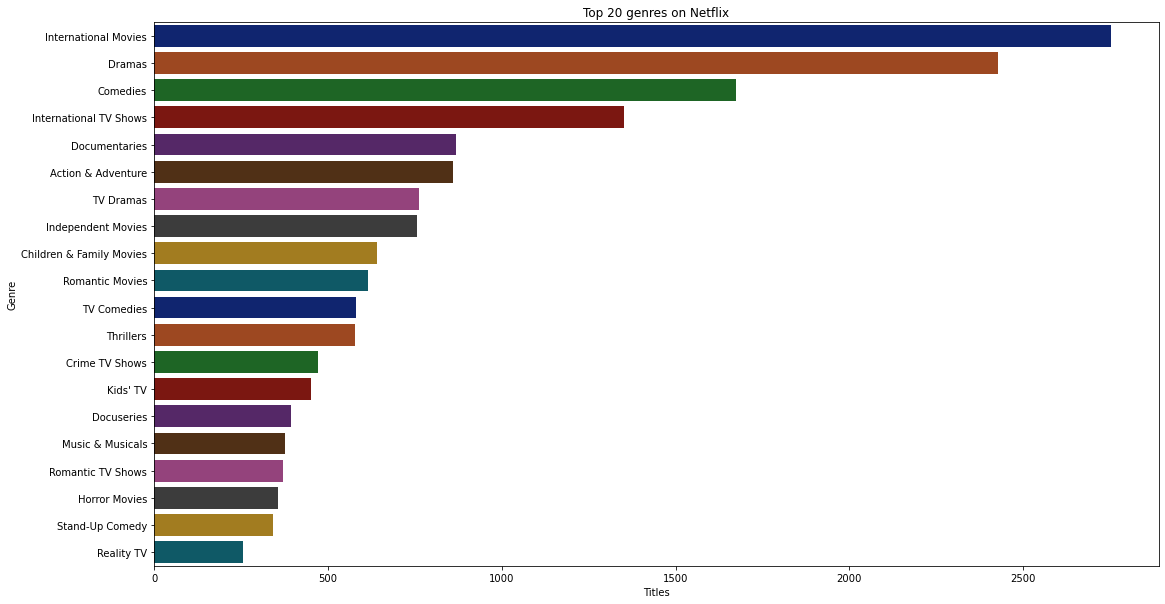

In [17]:
#countplot of the kind of content added to Netflix
plt.figure(figsize=(18,10))
sns.countplot(y = gn['Genre'], order=gn['Genre'].value_counts().index[:20],palette='dark')
plt.title("Top 20 genres on Netflix")
plt.xlabel('Titles')
plt.ylabel('Genre')
plt.show()

## Insight

International Movies is the most produced genre followed by Dramas, Comedies. 

## Top genres being produced in the top content producing countries

In [18]:
cnt_gn = cnt.merge(gn,how='left',on='title')

In [19]:
matplotlib.rcParams.update({'text.color': 'brown'})

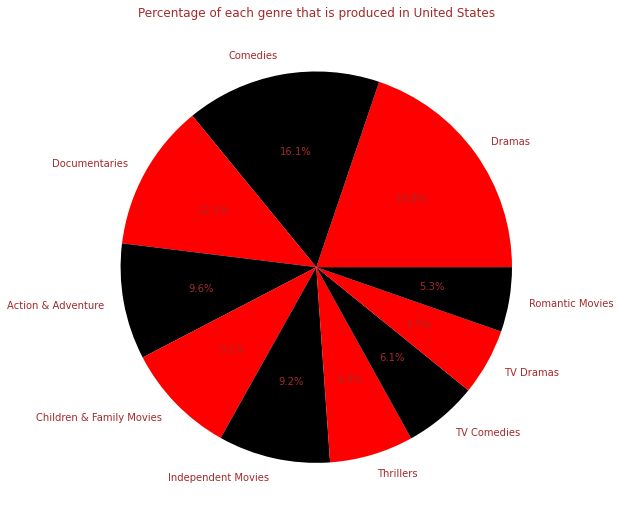

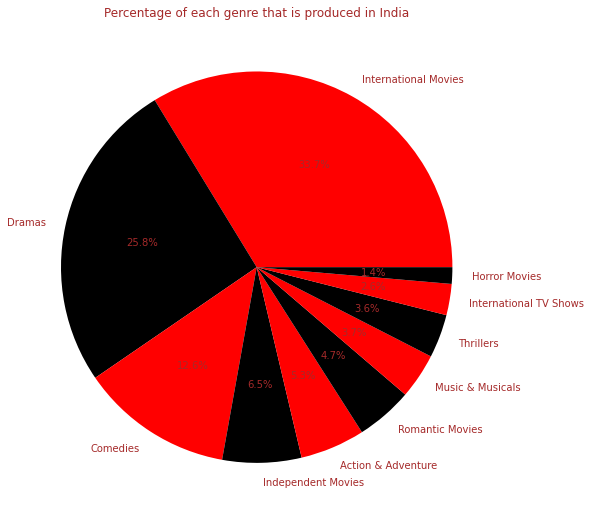

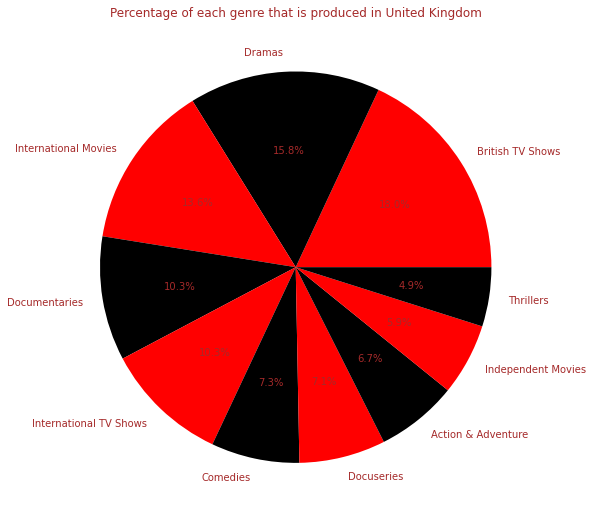

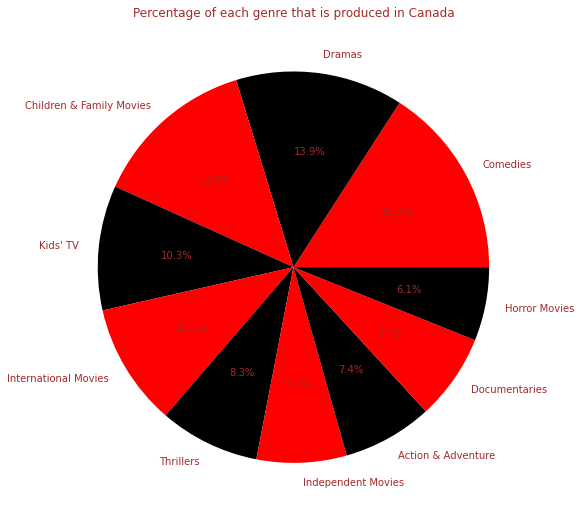

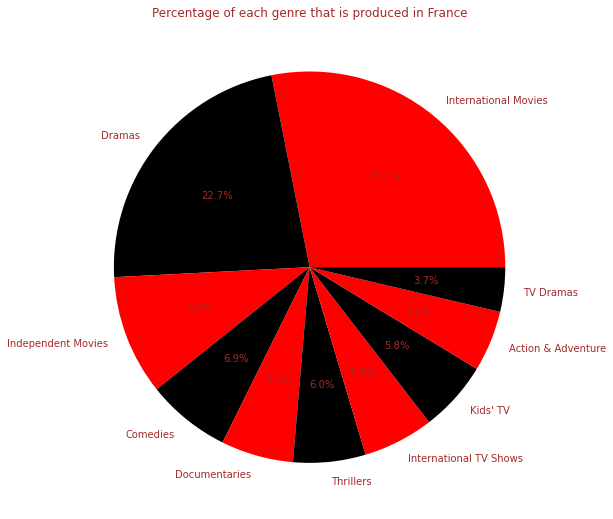

In [23]:
top_countries = ['United States','India','United Kingdom','Canada','France']#top 5 countries contributing to content
#pie chart depicting each genre's contibution to the total content produced by each country
for i in top_countries:
    plt.figure(figsize=(12,9))
    plt.title(f'Percentage of each genre that is produced in {i}')
    plt.pie(cnt_gn.loc[cnt_gn['Country'] == i]['Genre'].value_counts()[0:10], labels=cnt_gn.loc[cnt_gn['Country'] == i]['Genre'].value_counts().index[:10],autopct='%1.1f%%',colors=['r','black'])
    plt.show()
    
    

## Top countries producing the top genres

In [25]:
top_genres = ['International Movies','Dramas','Comedies','International TV Shows','Documentaries']

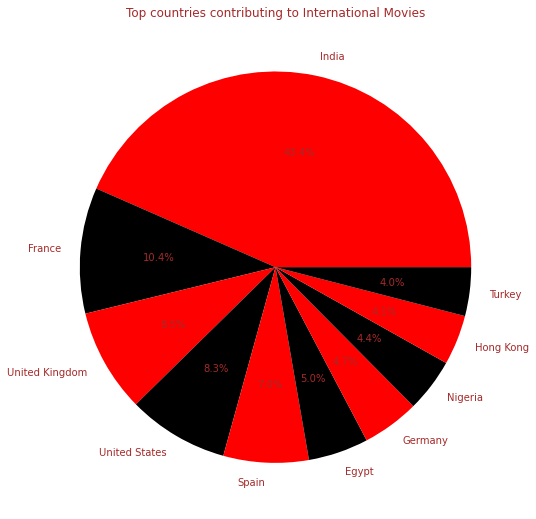

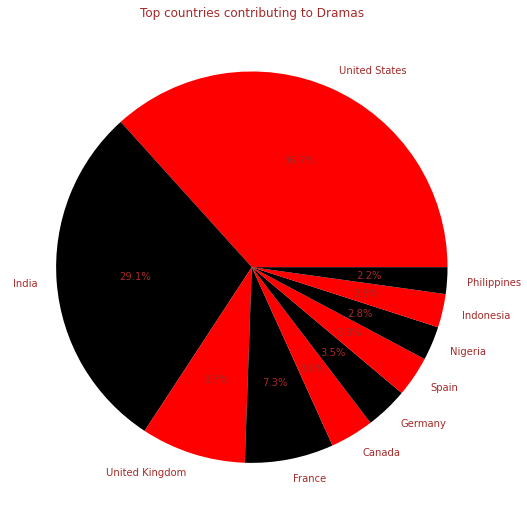

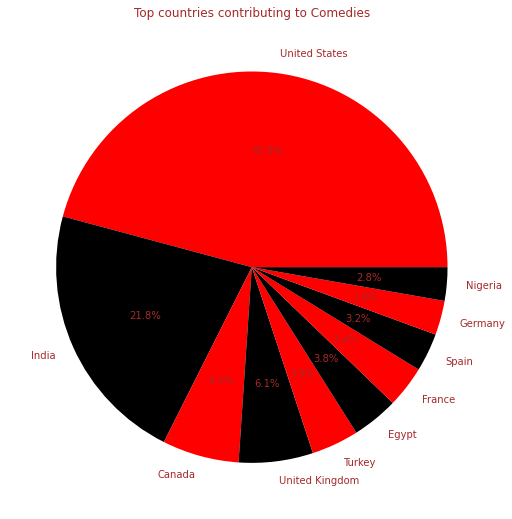

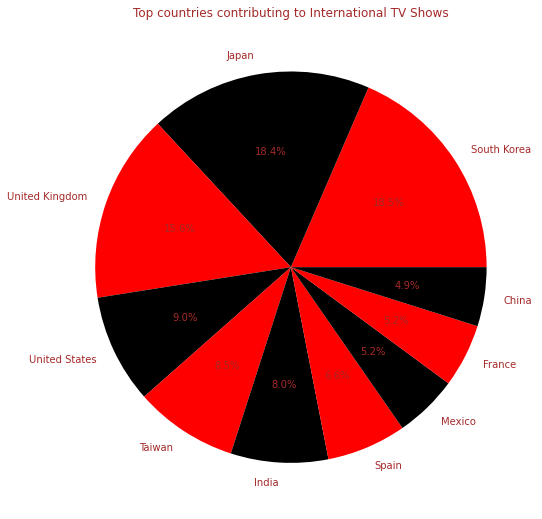

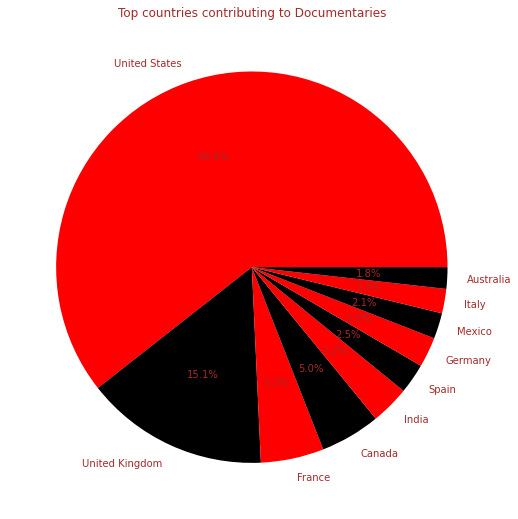

In [26]:
#pie chart depicting the contribution of various countries to each genre
for i in top_genres:
    plt.figure(figsize=(12,9))
    plt.title(f'Top countries contributing to {i}')
    plt.pie(cnt_gn.loc[cnt_gn['Genre'] == i]['Country'].value_counts()[0:10], labels=cnt_gn.loc[cnt_gn['Genre'] == i]['Country'].value_counts().index[:10],autopct='%1.1f%%',colors=['r','black'])
    plt.show()

### Insight

India is the highest contributor of International Movies. United States stands as the highest contributor for Dramas,Comedies and Documentaries

In [27]:
ndf.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [28]:
ndf['date_added'] = pd.to_datetime(ndf['date_added'])

In [29]:
Df = ndf.copy()

In [30]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [31]:
Df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [32]:
Df['year_added'] = Df.date_added.dt.year.astype('Int64')

In [33]:
Df['month_added'] = Df.date_added.dt.month_name()

In [34]:
movies = Df.loc[(Df['type'].str.contains('Movie')) & (Df['year_added'] != 2021)]

In [35]:
tv_shows = Df.loc[(Df['type'].str.contains('TV Show')) & (Df['year_added'] != 2021)]

In [36]:
mv_tv_till_2020 = Df.loc[Df['year_added'] != 2021]

## Movies vs TV Shows

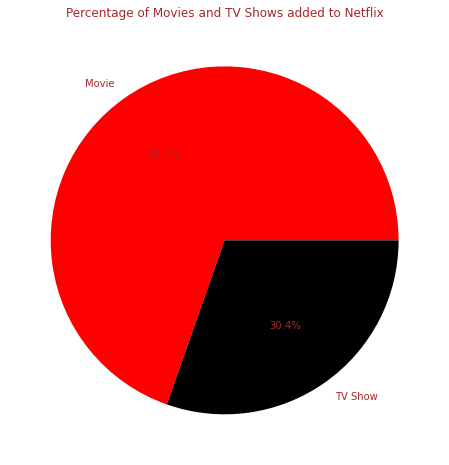

In [37]:
#pie chart depicting the contribution of movies and tv shows
plt.figure(figsize=(12,8))
plt.title('Percentage of Movies and TV Shows added to Netflix')
plt.pie(Df['type'].value_counts(),labels=Df['type'].value_counts().index,autopct='%1.1f%%',colors=['r','black'])

plt.show()

### Insight

The major content in Netflix is Movies

## Amount of content added to Netflix over years

In [38]:
matplotlib.rcParams.update({'text.color': 'black'})

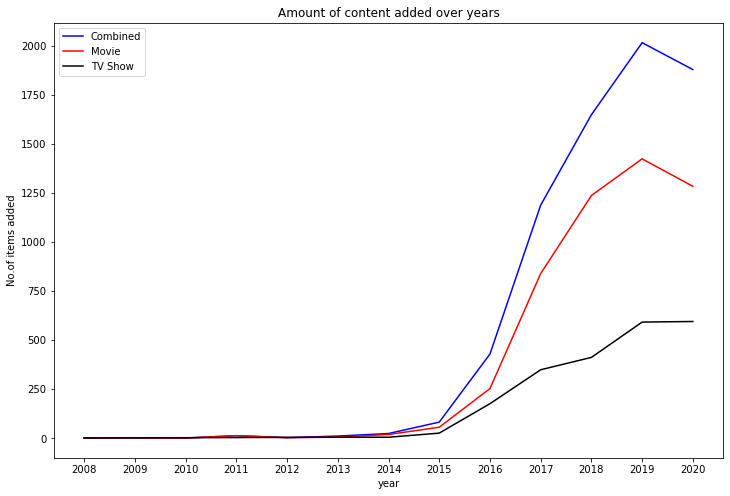

In [39]:
#line chart depicting the amount of content added over years
plt.figure(figsize=(12,8))
sns.lineplot(x=mv_tv_till_2020['year_added'].value_counts().index,y=mv_tv_till_2020['year_added'].value_counts(),color='b')
sns.lineplot(x=movies['year_added'].value_counts().index,y=movies['year_added'].value_counts(),color='r')
sns.lineplot(x=tv_shows['year_added'].value_counts().index,y=tv_shows['year_added'].value_counts(),color='black')
plt.title('Amount of content added over years')
plt.legend(['Combined','Movie','TV Show'])
plt.xticks(np.arange(2008, 2021))
plt.xlabel('year')
plt.ylabel('No.of items added')
plt.show()


## Insight

From above we can observe that the amount of content added to netflix increased drastically from 2015. Post 2019 we could observe a decrease in the content being added. This could be attributed to new OTT platforms like Amazon Prime,Disney+,HBO Max,Hulu etc emerging as a competetion to Netflix. So an indepth research has to be done as to the factors attributing to the reduction in content being added and how to stay dominant in the market.

From the above line chart we can observe that the slope of movies line is becoming more steeper whereas the slope of TV Shows line is tending to flatter in the recent years, meaning Netflix is focusing more on Movies than TV Shows in the recent years

In [40]:
matplotlib.rcParams.update({'text.color': 'black'})

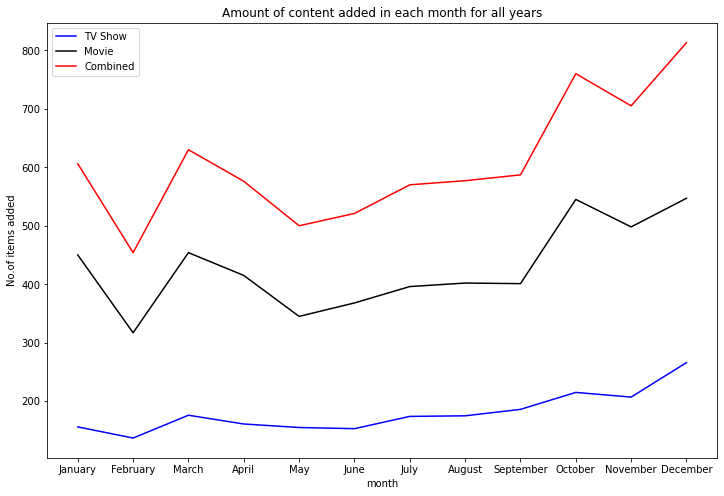

In [41]:
#line chart depicting the amount of content added in each month
plt.figure(figsize=(12,8))

#month-wise TV Shows
mnth_tv = tv_shows['month_added'].value_counts().sort_index(key=lambda x: pd.to_datetime(x, format="%B"))
sns.lineplot(x=mnth_tv.index,y=mnth_tv.values,color='b')

#month-wise movies
mnth_mv=movies['month_added'].value_counts().sort_index(key=lambda x: pd.to_datetime(x, format="%B"))
sns.lineplot(x=mnth_mv.index,y=mnth_mv.values,color='black')



#combined 
mn_mv_tv = mv_tv_till_2020['month_added'].value_counts().sort_index(key=lambda x: pd.to_datetime(x, format="%B"))
sns.lineplot(x=mn_mv_tv.index,y=mn_mv_tv.values,color='r')



plt.title('Amount of content added in each month for all years')
plt.legend(['TV Show','Movie','Combined'])

plt.xlabel('month')
plt.ylabel('No.of items added')

plt.show()

## Insight

A majority of content is added between Feb-Mar and sept-oct. The content added in the middle of the year is relatively low. we can see that December has the highest content being added. 

### Further Data Required for exploration

If we have data pertaining to the no.of new subscriptions and in that if there's such a thing happening where the no.of new subbscriptions added are high in december, we can confidently conclude that it's the best time to launch a TV Show.

Having the data of the no.of new subscriptions coming in various months brings in more valuable insights. So a request for further data is to be raised 

## Most Popular Directors 

In [42]:
movies = Df.loc[(Df['type'].str.contains('Movie'))]
tv_shows = Df.loc[(Df['type'].str.contains('TV Show'))]

In [43]:
dir_mv = process(movies,'director','Director') #directors of movies
dir_mv = dir_mv.loc[dir_mv['Director'] != 'nan']

dir_tv = process(tv_shows,'director','Director')#directors of TV Shows
dir_tv = dir_tv.loc[dir_tv['Director'] != 'nan']

dir_mv_tv = process(Df,'director','Director') #directors of TV Shows or movies
dir_mv_tv = dir_mv_tv.loc[dir_mv_tv['Director'] != 'nan']

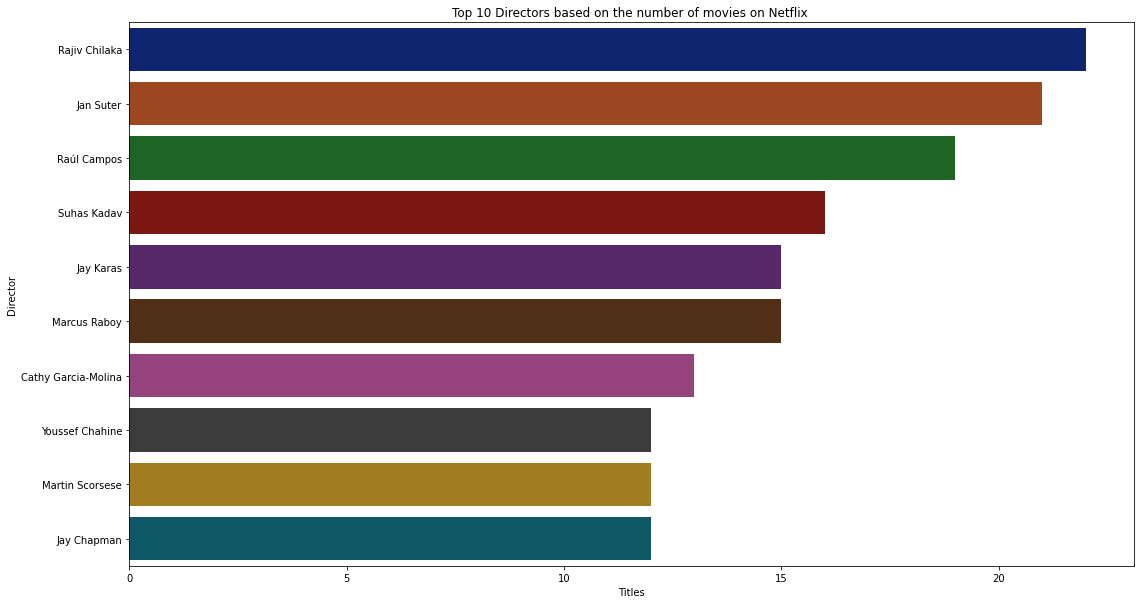

In [44]:
#countplot based on the number of movies
plt.figure(figsize=(18,10))
sns.countplot(y = dir_mv['Director'], order=dir_mv['Director'].value_counts().index[:10],palette='dark')
plt.title("Top 10 Directors based on the number of movies on Netflix ")
plt.xlabel('Titles')
plt.ylabel('Director')
plt.show()

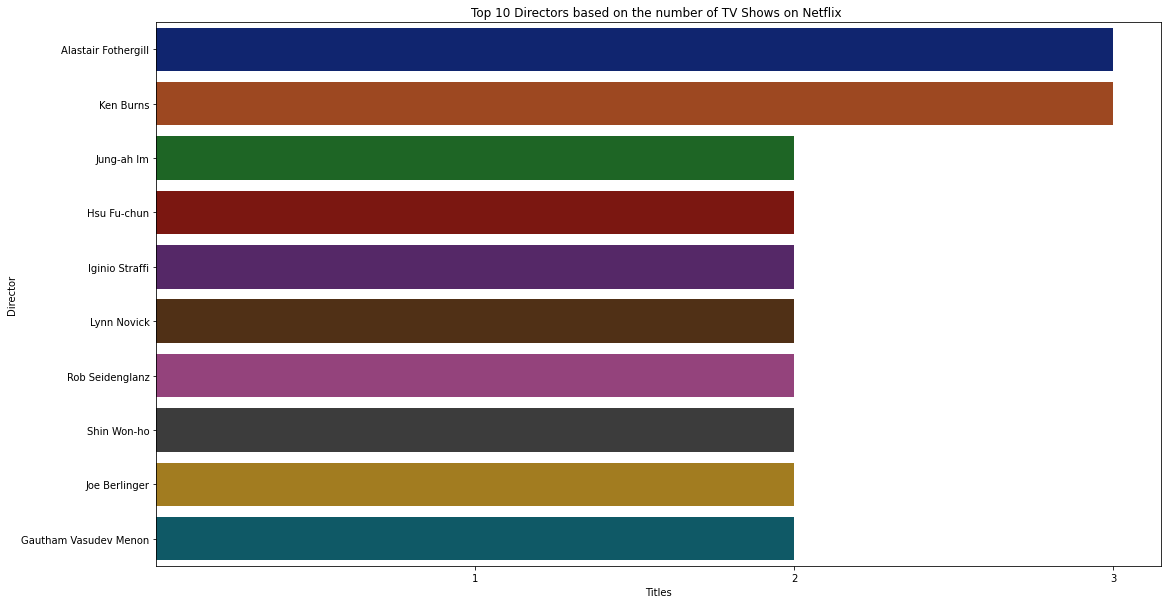

In [45]:
#countplot based on the number of movies
plt.figure(figsize=(18,10))
sns.countplot(y = dir_tv['Director'], order=dir_tv['Director'].value_counts().index[:10],palette='dark')
plt.title("Top 10 Directors based on the number of TV Shows on Netflix ")
plt.xlabel('Titles')
plt.ylabel('Director')
plt.xticks(np.arange(1,4))
plt.show()

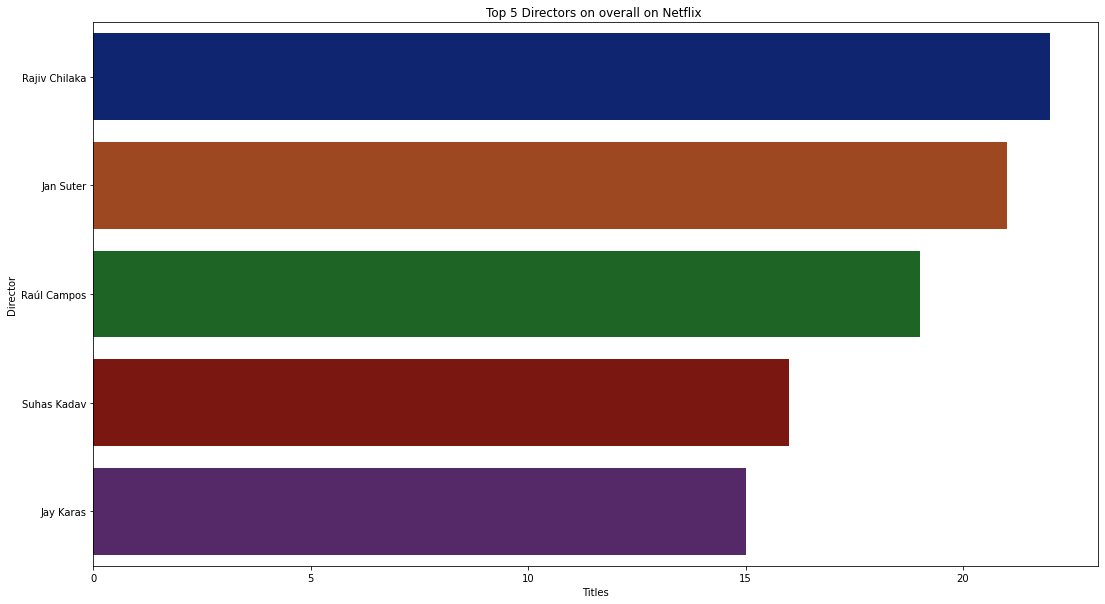

In [46]:
#countplot based on the number of movies
plt.figure(figsize=(18,10))
sns.countplot(y = dir_mv['Director'], order=dir_mv['Director'].value_counts().index[:5],palette='dark')
plt.title("Top 5 Directors on overall on Netflix ")
plt.xlabel('Titles')
plt.ylabel('Director')
plt.show()

## Insight

Rajiv Chilaka is the most popular director on Netflix followed by Jan Suter and Raul Campos

## Most Popular Actors

In [47]:
act_mv = process(movies,'cast','Actors') #directors of movies
act_mv = act_mv.loc[act_mv['Actors'] != 'nan']

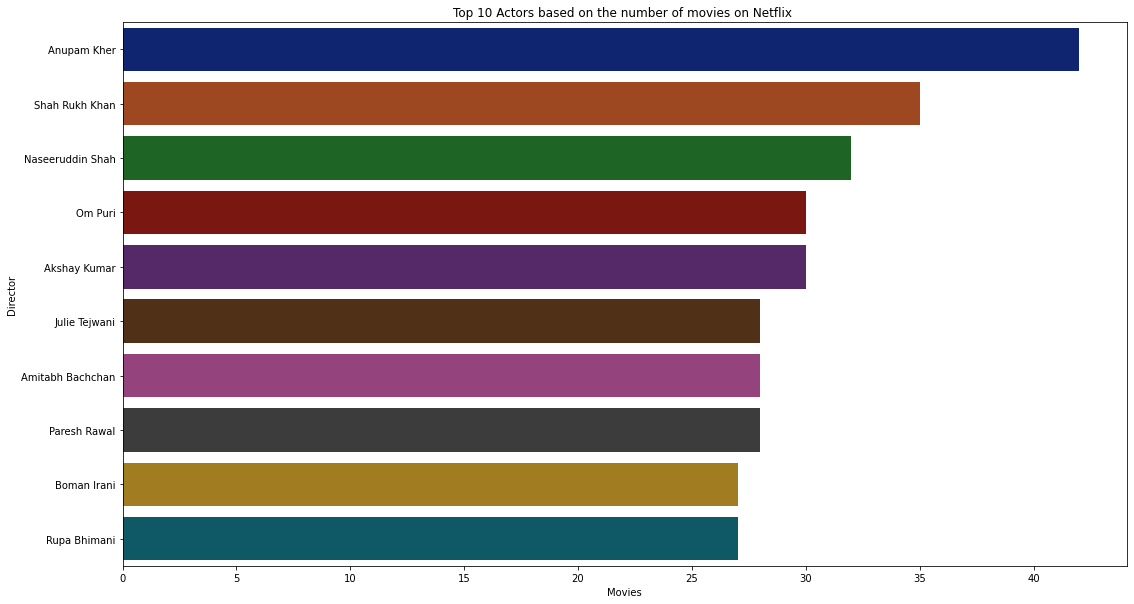

In [48]:
#countplot based on the number of movies
plt.figure(figsize=(18,10))
sns.countplot(y = act_mv['Actors'], order=act_mv['Actors'].value_counts().index[:10],palette='dark')
plt.title("Top 10 Actors based on the number of movies on Netflix ")
plt.xlabel('Movies')
plt.ylabel('Director')
plt.show()

In [49]:
act_tv = process(tv_shows,'cast','Actors') #directors of movies
act_tv = act_tv.loc[act_tv['Actors'] != 'nan']

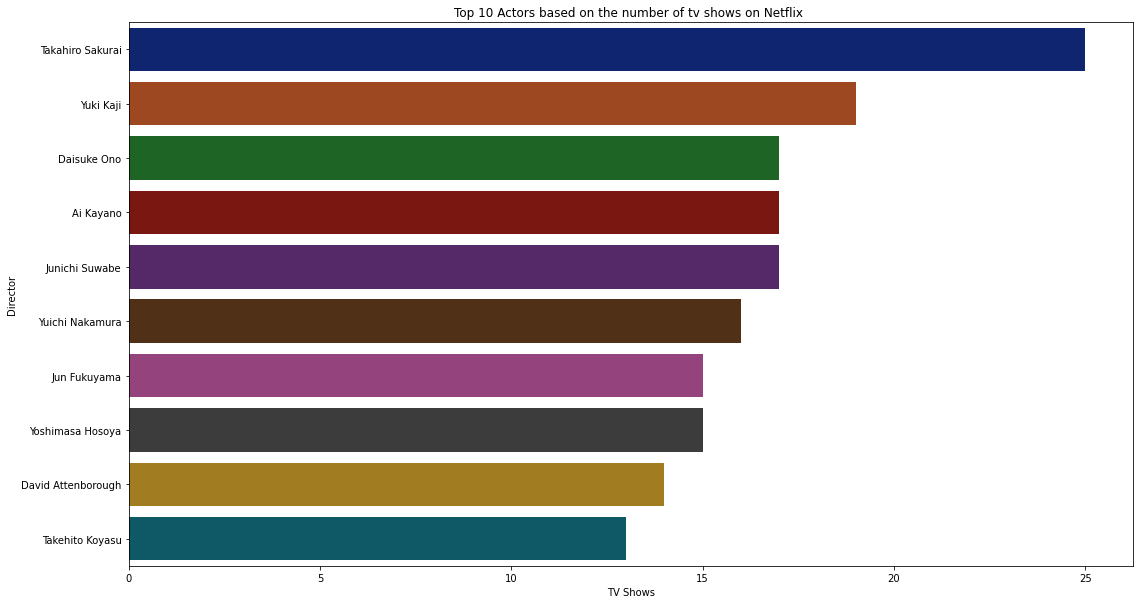

In [50]:
#countplot based on the number of tv shows
plt.figure(figsize=(18,10))
sns.countplot(y = act_tv['Actors'], order=act_tv['Actors'].value_counts().index[:10],palette='dark')
plt.title("Top 10 Actors based on the number of tv shows on Netflix ")
plt.xlabel('TV Shows')
plt.ylabel('Director')
plt.show()

## Insight

Anupam Kher is the most popular actor on Netflix followed by Shah Rukh Khan and Julie Tejwani.

For TV Shows the most popular actor is Takahiro Sakurai followed by Yuki Kaji and Junichi Suwabe

## Amount of content based on rating

In [51]:
df_rating = Df.loc[(Df['rating'] != '84 min') & (Df['rating'] != '74 min') & (Df['rating'] != '66 min')]

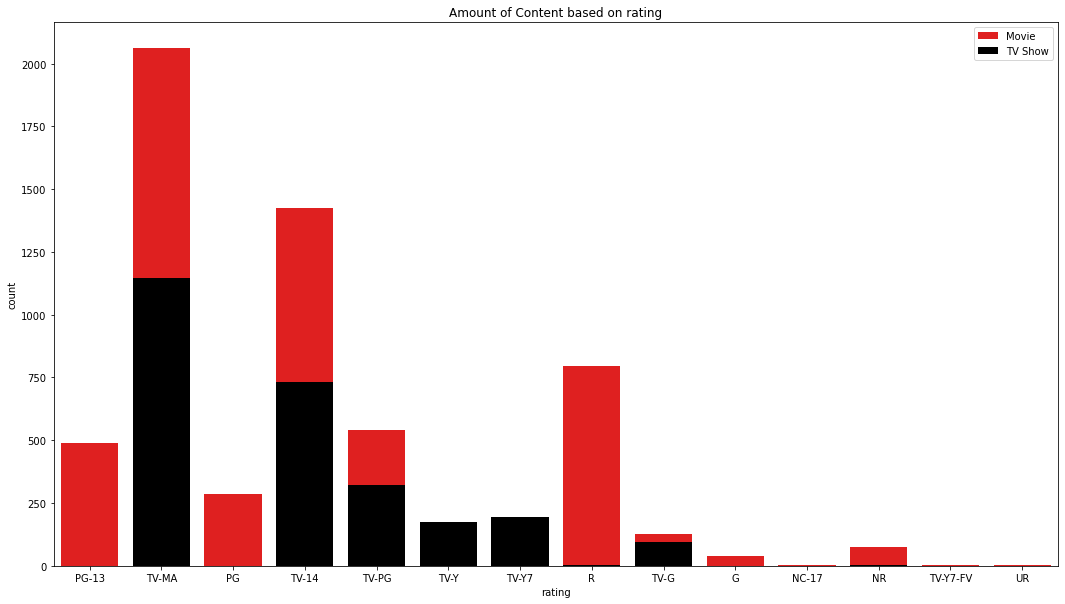

In [52]:
plt.figure(figsize=(18,10))
sns.countplot(data=df_rating,
          x='rating',
          hue='type',
          dodge=False, palette=['r','black'])
plt.legend(loc="upper right")
plt.title('Amount of Content based on rating')
plt.savefig('Amount of Content based on rating.png')
plt.show()


## Insight

TV-MA is the largest rating content in Netflix. It is also the largest rating content for both movies and TV Shows.

## Duration Analysis of movies

In [53]:
mv_dur = pd.DataFrame(movies,columns=['rating','duration','title'])

In [54]:
mv_dur.dropna(inplace=True)

In [55]:
mv_dur['duration'] = mv_dur['duration'].str.replace('min','')
mv_dur['duration'] = mv_dur['duration'].astype('int')

In [56]:
mv_dur['duration'].mean()

99.58488410055502

In [57]:
print(max(mv_dur['duration']))
print(min(mv_dur['duration']))

312
3


In [58]:
mv_dur.loc[mv_dur['duration'] == 312]['title']

4253    Black Mirror: Bandersnatch
Name: title, dtype: object

In [59]:
Df.loc[Df['title'] == 'Black Mirror: Bandersnatch']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
4253,s4254,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018-12-28,2018,TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",2018,December


In [60]:
mv_dur.loc[mv_dur['duration'] == 3]['title']

3777    Silent
Name: title, dtype: object

In [61]:
Df.loc[Df['title'] == 'Silent']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
3777,s3778,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",NaN,United States,2019-06-04,2014,TV-Y,3 min,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ...",2019,June


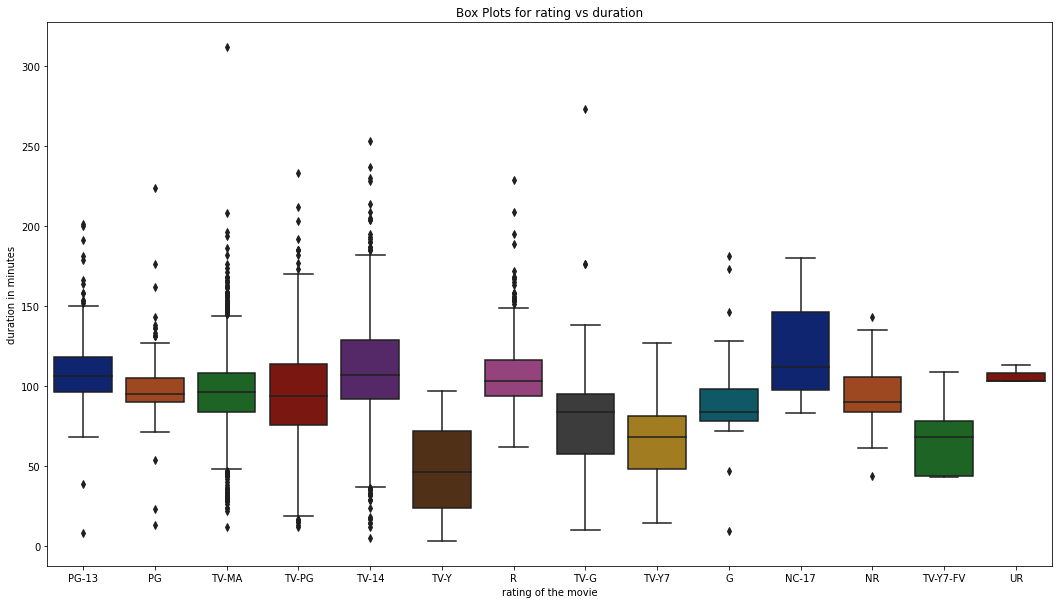

In [62]:
plt.figure(figsize=(18,10))
sns.boxplot(data=mv_dur,
            x="rating",
            y='duration',palette='dark')
plt.title('Box Plots for rating vs duration')
plt.xlabel('rating of the movie')
plt.ylabel('duration in minutes')
plt.show()


In [63]:
tv_shows['duration'].value_counts()

1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
12 Seasons       2
15 Seasons       2
11 Seasons       2
17 Seasons       1
Name: duration, dtype: int64

## Insight

On an average each movie has a duration of 99.57 minutes. The longest movie is Black Mirror: Bandersnatch
having a duration of 312 minutes and the shortest movie is a short film named Silent having a duration of just 3 minutes

A large number of TV Shows has only 1 season



In [64]:
from wordcloud import WordCloud, STOPWORDS

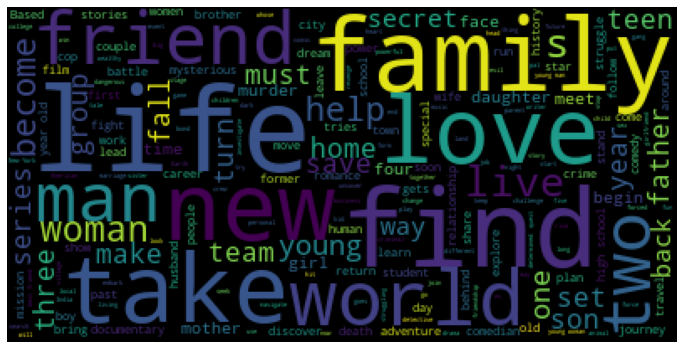

In [65]:
import matplotlib.pyplot as plt

text = ' '.join(ndf['description'])
wordcloud2 = WordCloud().generate(text)
# Generate plot
plt.figure(figsize = (12, 10), facecolor = None) 
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

## Insight

Generally in a business we tend to make business decisions as per the customers' behaviour.But here in this one particular case the opposite must be done. The above word cloud gives us a glance of most occuring words. Since audience always expect something new everytime they watch a TV show or a movie, the description of their upcoming movies must be unique(not containing the words from above word cloud and that happens only when a movie is unique),meaning we must try to produce such films that are unique and doesn't fit into the definition of regular movie 
that are been made so far.

This serves 2 business purposes:

1. Since audience are presented with the new experience they stay in the platform , i.e the idea for the audience to go search for new content reduces drastically. This increases the customer retention rate. It also reduces the churn

2.Whenever a unique movie or show is made and if it's good one social media is flodded with the memes. Audience tend to watch them and so this brings in a lot of new subscriptions. So this idea of producing a unique films has a potential to bring in new cutomers and convert them into regular customers.

### Recommendation

1.Produce unique movies

2.It would be better to have a variable new_customers_added for every TV show or movie to infer on the how the the kind of content is bringing in the new cutomers

3.An indepth research has to be done as to the factors attributing to the reduction in content being added post 2019 and how to stay dominant in the market

4.Content being addded in the middle of the year is quite low compared to the content added at the beginning and ending of an year. So should try on adding the content in the middle of the year and see if that helps in the growth of the business